In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [8]:

function run_example()
    p = 120.0;
    k = (0.05 / 1.25) * p;
    δ = 0.15;
    function FR12(u, b1, b2)
        lambda1 = 0.25
        lambda2 = 0.5
        return (-b1 * lambda2 * exp(-u * lambda1 / b1) + b2 * lambda1 * exp(-lambda2 * u / b2) + b1 * lambda2 - b2 * lambda1) / (b1 * lambda2 - b2 * lambda1)
    end

    F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
    #F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
    F2(x) = 1 - exp(-0.7071067812 * sqrt(x))
    FR1(x, a1) = F1(x / a1)
    FR2(x, a2) = F2(x / a2)


    FR(r, x) =
        0.3333333333333333 * FR1(x, r[1]) +
        0.4 * FR2(x, r[2]) +
        0.26666666666666666 * FR12(x, r[1], r[2])
    ER1(a1) = 2.4 * a1
    ER2(a2) = 4 * a2
    ER12(a1, a2) = 4 * a1 + 2 * a2
    ER(r) =
        0.3333333333333333 * ER1(r[1]) +
        0.4 * ER2(r[2]) +
        0.26666666666666666 * ER12(r[1], r[2])

    EnoR = ER([1.0, 1.0])
    res = bisection_hjbsolver(
        a=0,
        b=p / δ^2,
        max_it=20,
        NRe=2,
        β=5.0 + 6.0 + 4.0,
        FR=FR,
        ER=ER,
        EnoR=EnoR,
        partition=(0.0, 19.0, 200.0, 800.0),
        Δx=0.05,
        SearchRanges=([(0.0, 1.0), (0.0, 1.0)], [(0.0, 1.0), (1.0, 1.0)]),
        η=0.25,
        η1=0.3,
        δ=0.15,
        MaxEvals=1500,
        p=p,
        L=300,
    )
    return res
end

run (generic function with 1 method)

In [9]:
res = run_example();

(0, 2666.666666666667, 5333.333333333334)
(0, 1333.3333333333335, 2666.666666666667)
(0, 666.6666666666667, 1333.3333333333335)
10%, V(80.0) = 4054.8   Time = 52.8 seconds
(0, 333.33333333333337, 666.6666666666667)
10%, V(80.0) = 1950.9   Time = 51.5 seconds
20%, V(160.0) = 3279.0   Time = 204.0 seconds
30%, V(240.0) = 5276.3   Time = 325.0 seconds
(0, 166.66666666666669, 333.33333333333337)
10%, V(80.0) = 898.77   Time = 55.4 seconds
20%, V(160.0) = 1190.7   Time = 226.0 seconds
(166.66666666666669, 250.00000000000003, 333.33333333333337)
10%, V(80.0) = 1424.9   Time = 62.8 seconds
20%, V(160.0) = 2235.0   Time = 237.0 seconds
30%, V(240.0) = 3248.5   Time = 362.0 seconds
40%, V(320.0) = 4705.9   Time = 362.0 seconds
50%, V(400.0) = 7030.1   Time = 362.0 seconds
(166.66666666666669, 208.33333333333337, 250.00000000000003)
10%, V(80.0) = 1161.8   Time = 62.0 seconds
20%, V(160.0) = 1712.9   Time = 228.0 seconds
30%, V(240.0) = 2234.5   Time = 341.0 seconds
40%, V(320.0) = 2739.3   Time

11-element Vector{Any}:
 (0.0:0.05:8.95, [2666.666666666667, 2692.0385847090674, 2717.65933345026, 2742.938467653883, 2768.0209728539635, 2792.97626859023, 2817.84379327775, 2842.6477662216903, 2867.4033189935717, 2892.1197128725166  …  5584.307290599401, 5596.679616917051, 5609.024908151467, 5621.343375501571, 5633.635223518394, 5645.900670621717, 5658.139890575121, 5670.3530914074245, 5682.54046914089, 5694.702222692037], [507.438360848008, 512.4149748238461, 505.5826840724624, 501.65010400160935, 499.10591472533537, 497.35049375040444, 496.0794588788071, 495.1110554376288, 494.32787757890156, 493.647448187665  …  247.44652635299644, 246.90582468831846, 246.36934700208374, 245.83696033646277, 245.30894206645837, 244.78439906808995, 244.26401664606664, 243.7475546693163, 243.235071022932, 242.72630013498716], [1.0 1.0; 0.9999971499321768 0.999999981783877; … ; 0.2761192960638282 0.9999979076158646; 0.27975720274271604 0.9999992738665753], 1)
 (0.0:0.05:46.35, [1333.3333333333335, 1346

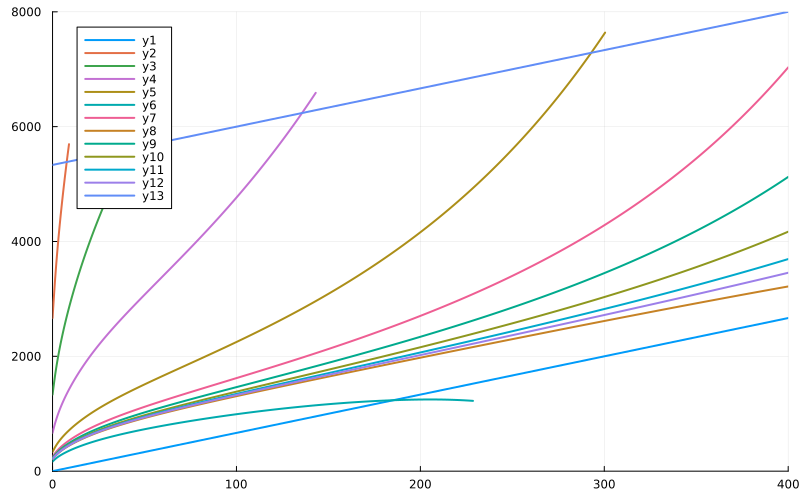

In [16]:
p = 120.0;
δ = 0.15;
plot(x -> x / δ, xlims=(0, 400),ylims=(0,8000), size=(800, 500), linewidth=2)
for i = 1:length(res)
    plot!(res[i][1], res[i][2],  linewidth=2)
end
plot!(x -> x / δ + p / δ^2, linewidth=2)

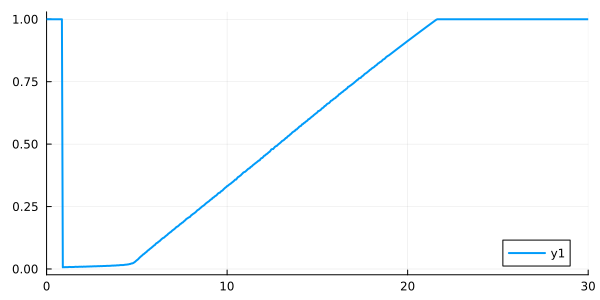

In [11]:
plot(res[end][1], res[end][4][:, 1], size=(600, 300), xlims=(0, 30), linewidth=2)

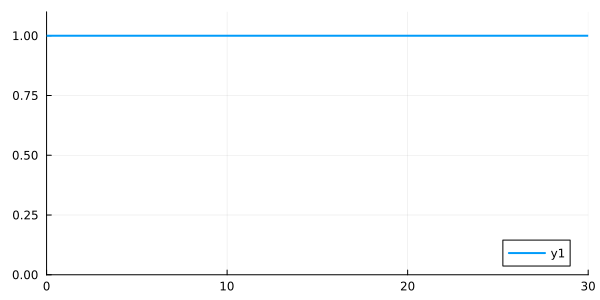

In [14]:
plot(res[end][1], res[end][4][:, 2], size=(600, 300), xlims=(0, 30), ylims=(0, 1.1), linewidth=2)